<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Homework-0" data-toc-modified-id="Homework-0-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework 0</a></span><ul class="toc-item"><li><span><a href="#0.3" data-toc-modified-id="0.3-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>0.3</a></span></li><li><span><a href="#0.4" data-toc-modified-id="0.4-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>0.4</a></span></li><li><span><a href="#0.7" data-toc-modified-id="0.7-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>0.7</a></span></li><li><span><a href="#.17" data-toc-modified-id=".17-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>.17</a></span></li><li><span><a href="#.18" data-toc-modified-id=".18-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>.18</a></span></li></ul></li></ul></div>

# Homework 0

## 0.3
(Q) = Quantitative, (C) = Categorical 
a. 
Observational Units:
Baseball games

Response Variable: 
Time required to play a Major League Baseball game (Q).

Explanatory Variable:
total number of runs scored (Q), margin of victory (Q), total number of pitchers used (Q), ballpark attendance (Q), which league the teams were in (C). 

b. 
Observational Units:
A putt

Response Variable: 
The liklihood of making a putt

Explanatory Variable:
length of putt (Q)

c. 
Observational Units:
LaDainian Tomlinson

Response Variable: 
No response variable

Explanatory Variable:
No explanatory variables

## 0.4

a. 
Observational Units:
Volleyball player 

Response Variable: 
The liklihood of winning a point (C) 

Explanatory Variable:
Type of serve (C)


b. 
Observational Units:
Sport games 

Response Variable: 
Home field advantage effect (C)

Explanatory Variable:
Major team sports (C)


c. 
Observational Units:
Individual golfers 

Response Variable: 
Distance the golf ball is driven (Q) and the percentage that hits the fairway (Q)

Explanatory Variable:
Sex of the golfer (C) 


## 0.7

a. What is the population of interest to the registrar at this college? 
All members of the entering class to the college.

b. Are the descriptive summaries computee by the registrar statistics or parameters? Explain.
Parameters because they computed the summaries using all members of the entering class i.e. the entire population

c. What is the population of interest to the Math department? 
Students in the entering class who want to take mathematics

d. Are the numerical summaries statistics or parameters? Explain. 
Statistics because the math department takes a sample to compute them; they do not use the entire population.

## .17

In [22]:
library(Stat2Data)
library(lattice)
data(Marathon)
# Remove all rows with unknown values (there is only one)
Marathon = na.omit(Marathon)
head(Marathon)

Date,Miles,Time,Pace,ShoeBrand,TimeMin,PaceMin,Short,After2004
1/1/2002,5.0,38:31:00,7:42:12,,38.517,7.703,1,0
1/3/2002,5.0,41:05:00,8:13:00,,41.083,8.217,1,0
1/5/2002,4.0,31:21:00,7:50:15,,31.350,7.838,1,0
1/6/2002,6.0,53:52:00,8:58:40,,53.867,8.978,0,0
1/8/2002,4.5,40:19:00,8:57:33,,40.317,8.959,1,0
1/9/2002,5.0,39:51:00,7:58:12,,39.850,7.970,1,0


Define competing models and associated hypothesis

$\mu_1$ = The average time on short runs<br>
$\mu_2$ = The average time on long runs

Null Hypothesis: $\mu_1 = \mu_2 \Rightarrow \hat{y} = \mu_{\bar{y}} + \epsilon$, where $\bar{y}$ is the sample mean
<br>
Alternative Hypothesis: $\mu_1 \neq \mu_2 \Rightarrow \hat{y} = \mu_i + \epsilon$

Find p-value for the hypothesis you defined above as well as the 95% confidence interval

In [23]:
# Following what was done for WeightLossIncetive4
t.test(Marathon$PaceMin ~ Marathon$Short)


	Welch Two Sample t-test

data:  Marathon$PaceMin by Marathon$Short
t = 6.6991, df = 962.52, p-value = 3.563e-11
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.1389206 0.2540322
sample estimates:
mean in group 0 mean in group 1 
       8.157665        7.961188 


This is just for reference: t-test assumptions include those regarding the scale of measurement, random sampling, normality of data distribution, adequacy of sample size and equality of variance in standard deviation (standard deviations of samples are ~ equal). From: https://www.investopedia.com/ask/answers/073115/what-assumptions-are-made-when-conducting-ttest.asp

Interpret p-value and the 95% condifience interval. in regards to the research question.

Given that the p-value is sufficiently small (the t-statistic is well outside the 95% confidence interval), 
we can safely reject the null hypothesis. This means that it is highly unlikely that the results were do to 
chance, and it is much more likely that there is a real difference in the average run times per mile for the runner. With that said and the fact that the runner runs faster per mile when the distance of the run is shorter, we can infer that the runner will in general run faster per mile in this case. 

Assess the model fit by assessing the residuals (QQ Plot) (No R code displayed).

In [24]:
shortPaceMinMu <- mean(Marathon$PaceMin[Marathon$Short==0])
longPaceMinMu <- mean(Marathon$PaceMin[Marathon$Short==1])

Fit <- shortPaceMinMu*(1-Marathon$Short) + longPaceMinMu*Marathon$Short
Resid <- Marathon$PaceMin - Fit

head(cbind(Marathon$PaceMin, Fit, Resid))

,Fit,Resid
7.703,7.961188,-0.258188341
8.217,7.961188,0.255811659
7.838,7.961188,-0.123188341
8.978,8.157665,0.820335294
8.959,7.961188,0.997811659
7.970,7.961188,0.008811659


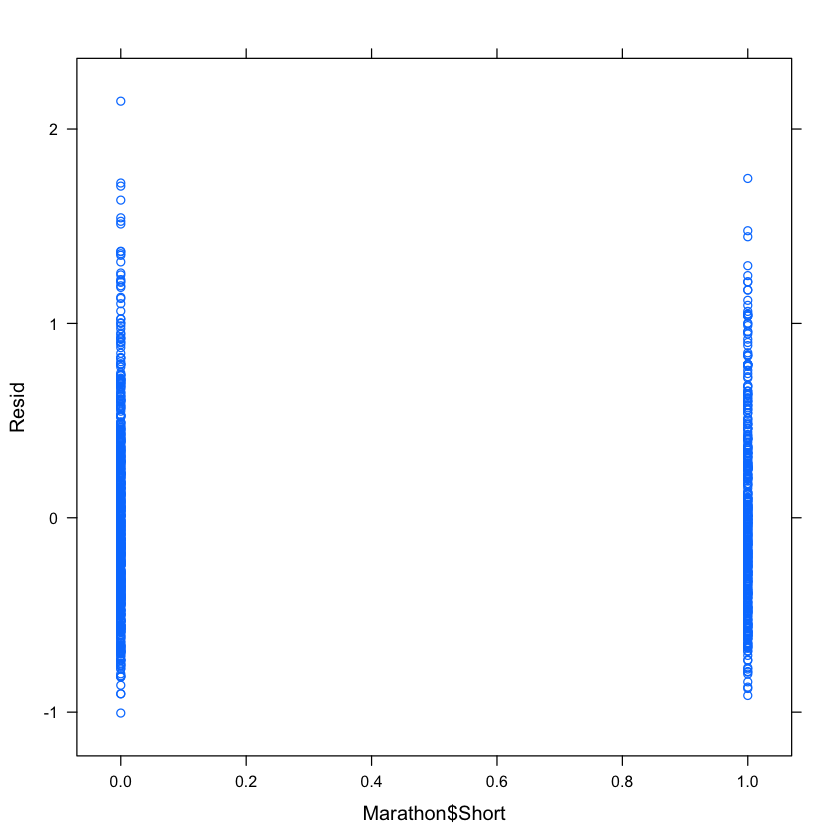

In [25]:
xyplot(Resid ~ Marathon$Short)

In [26]:
# Useful resource: https://onlinecourses.science.psu.edu/stat461/node/51

LongResidual = Resid[Marathon$Short==1]
ShortResidual = Resid[Marathon$Short==0]

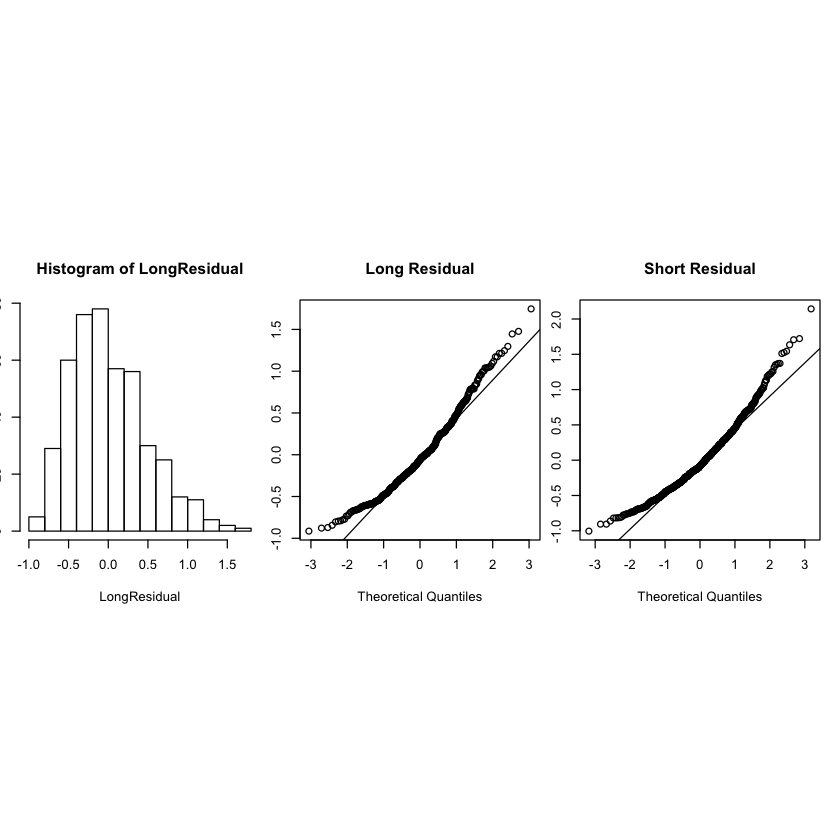

In [27]:

# This controls how many plots are plotted c(# rows, # columns)
par(mfrow=c(1,3))
par(pin=c(2,2))
hist(LongResidual)

qqnorm(LongResidual, ylab="Long Residual", main="Long Residual")
qqline(LongResidual)
qqnorm(ShortResidual, ylab="Short Residual", main="Short Residual")
qqline(ShortResidual)

Analyze the QQ plot

Based on the historgram and the QQ plot, there is a right skew and it deviates from the normal distribution in the tails, which could mean we are incorrect to assume a normal distribution and possibly should reject the validity of the t test results. It does seem relatively normal though so I think we need a more precise test to know for certain if we should consider the data's distribution to be normal

## .18

Define competing models and associated hypothesis

$\mu_{1}$ = The average running pace when runner is older<br>
$\mu_{1}$ = The average running pace when runner is younger

Null Hypothesis: $\mu_{1} = \mu_{2} \Rightarrow \hat{y} = \mu_{\bar{y}} + \epsilon$, where $\bar{y}$ is the sample mean
<br>
Alternative Hypothesis: $\mu_{1} \neq \mu_{2} \Rightarrow \hat{y} = \mu_i + \epsilon$

and 

$\mu_{1}$ = The average distance per day when runner is older<br>
$\mu_{2}$ = The average distance per day when runner is younger

Null Hypothesis: $\mu_{1} = \mu_{2} \Rightarrow \hat{y} = \mu_y + \epsilon$, where $\bar{y}$ is the sample mean 
<br>
Alternative Hypothesis: $\mu_{1} \neq \mu_{2} \Rightarrow \hat{y} = \mu_i + \epsilon$

Find p-value for the hypothesis you defined above as well as the 95% confidence interval

In [28]:
# We do this for PaceMin and Miles
print('Pace in Min test')
t.test(Marathon$PaceMin ~ Marathon$After2004)
print('Miles test')
t.test(Marathon$Miles ~ Marathon$After2004)

[1] "Pace in Min test"



	Welch Two Sample t-test

data:  Marathon$PaceMin by Marathon$After2004
t = -18.715, df = 813.19, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5488239 -0.4446252
sample estimates:
mean in group 0 mean in group 1 
       7.914414        8.411139 


[1] "Miles test"



	Welch Two Sample t-test

data:  Marathon$Miles by Marathon$After2004
t = 3.9458, df = 937.32, p-value = 8.549e-05
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.4362855 1.2997230
sample estimates:
mean in group 0 mean in group 1 
       7.496804        6.628800 


Interpret p-value and the 95% condifience interval in regards to the research question.

According to the p-value, t-statistic, and confidence interval in both instances, the runner has a real difference in average miles run and pace per mile in the two different time periods. Since the average pace per mile is lower in later years, perhaps the runner is slower because he or she is getting older. However, he or she does run more miles, so we could make an educated guess that his or her stamina is improving over time

Assess the model fit by assessing the residuals (QQ Plot) (No R code displayed).

In [29]:
afterPaceMinMu <- mean(Marathon$PaceMin[Marathon$After2004==1])
beforePaceMinMu <- mean(Marathon$PaceMin[Marathon$After2004==0])

FitPaceMin <- afterPaceMinMu*(1-Marathon$After2004) + beforePaceMinMu*Marathon$After2004
ResidPaceMin <- Marathon$PaceMin - FitPaceMin

afterMileMu <- mean(Marathon$Mile[Marathon$After2004==1])
beforeMileMu <- mean(Marathon$Mile[Marathon$After2004==0])

FitMile <- afterMileMu*(1-Marathon$After2004) + beforeMileMu*Marathon$After2004
ResidMile <- Marathon$Mile - Fit

head(cbind(Marathon$PaceMin, FitPaceMin, ResidPaceMin))
head(cbind(Marathon$Mile, FitMile, ResidMile))

,FitPaceMin,ResidPaceMin
7.703,8.411139,-0.7081387
8.217,8.411139,-0.1941387
7.838,8.411139,-0.5731387
8.978,8.411139,0.5668613
8.959,8.411139,0.5478613
7.970,8.411139,-0.4411387


,FitMile,ResidMile
5.0,6.6288,-2.961188
5.0,6.6288,-2.961188
4.0,6.6288,-3.961188
6.0,6.6288,-2.157665
4.5,6.6288,-3.461188
5.0,6.6288,-2.961188


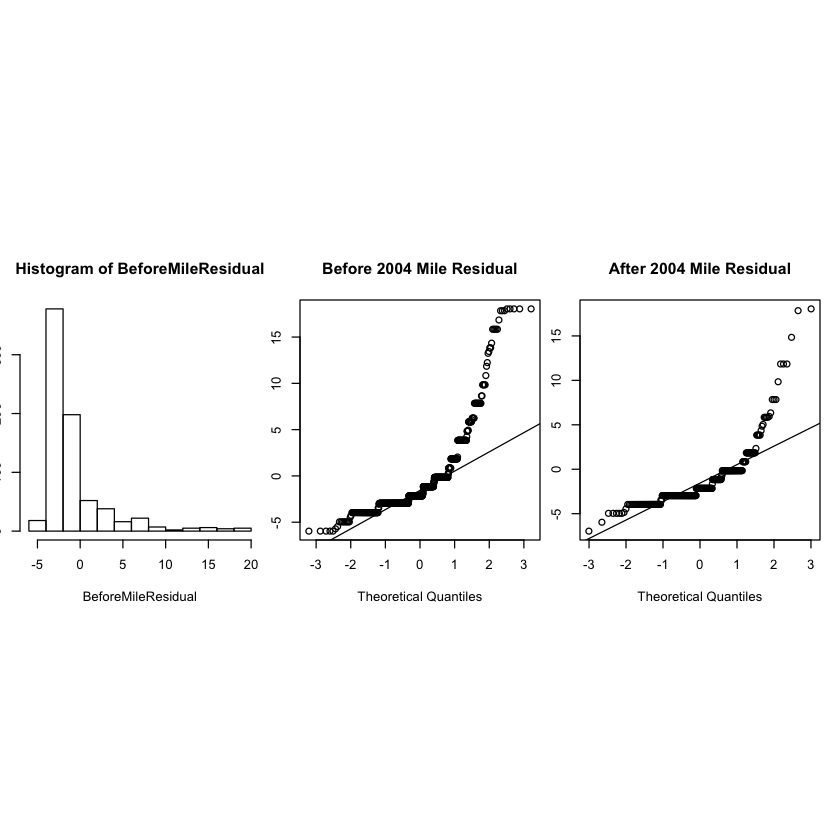

In [30]:
AfterMileResidual = ResidMile[Marathon$After2004==1]
BeforeMileResidual = ResidMile[Marathon$After2004==0]

AfterPaceMinResidual = ResidPaceMin[Marathon$After2004==1]
BeforePaceMinResidual = ResidPaceMin[Marathon$After2004==0]

par(mfrow=c(1,3))
par(pin=c(2,2))
hist(BeforeMileResidual)
qqnorm(BeforeMileResidual, ylab="Before 2004 Mile Residual", main="Before 2004 Mile Residual")
qqline(BeforeMileResidual)

qqnorm(AfterMileResidual, ylab="After 2004 Mile Residual", main="After 2004 Mile Residual")
qqline(AfterMileResidual)

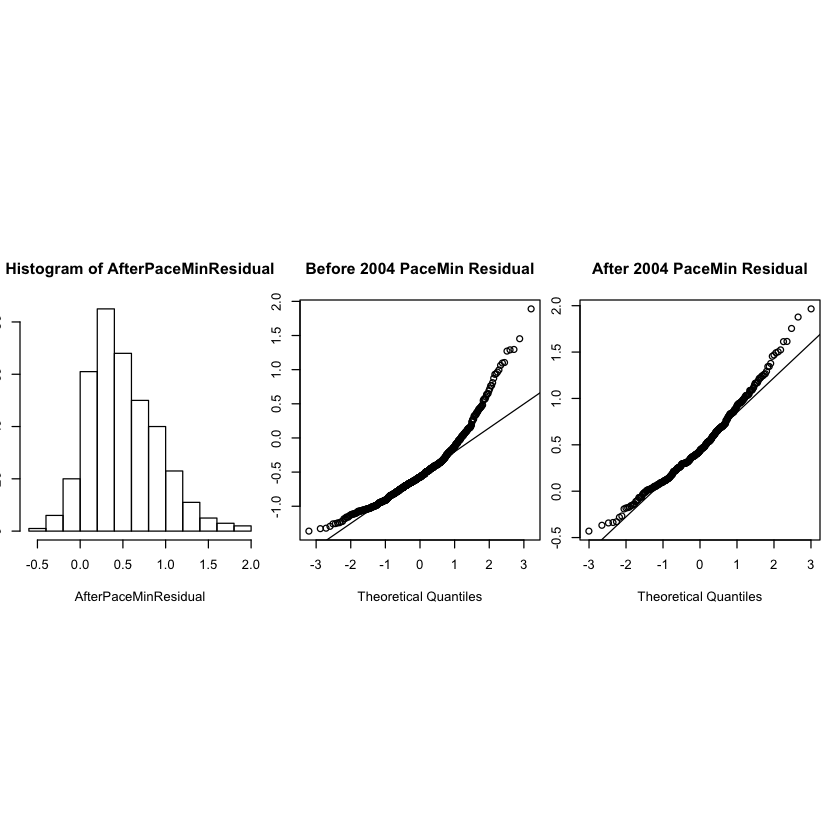

In [31]:
par(mfrow=c(1,3))
par(pin=c(2,2))
hist(AfterPaceMinResidual)
qqnorm(BeforePaceMinResidual, ylab="Before 2004 PaceMin Residual", main="Before 2004 PaceMin Residual")
qqline(BeforePaceMinResidual)

qqnorm(AfterPaceMinResidual, ylab="After 2004 PaceMin Residual", main="After 2004 PaceMin Residual")
qqline(AfterPaceMinResidual)

Analyze the QQ plot

The QQ plot Before 2004 Mile and After 2004 Mile certainly does not follow the normal line so this means that the results of the t test are invalid and we cannot conclude that there is a real difference (i.e. not due to random chance) in miles ran before 2004 and after 2004

The QQ plot for Before 2004 PaceMin definitely seems to have a right skew as more data points are clustered in the negative quantiles, and the points in the positive observed quantiles do not follow the line. This might break the assumption of normality, and therefore our test results may be invalid. The after 2004 PaceMin QQ plot follows the normal line a lot better so it probably does not break the assumption of normality. 